In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
import os

## Download data

In [33]:
# Get the current working directory
directory = os.getcwd()

# Load data
directory_data = directory + '\\Data\\sfo 2018_data file_final_Weighted.xlsx'
data_2018 = pd.read_excel(directory_data, engine='openpyxl', sheet_name='DATA')
code_list_2018 = pd.read_excel(directory_data, engine='openpyxl', sheet_name='Code List')

## Get to know data

In [34]:
data_2018.head()

,RESPNUM,CCGID,RUNID,INTDATE,DAY,GATE,BAREA,STRATA,PEAK,METH,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
0,1842,1680,552,21,2,102,G,3,3,1,...,15,2,6,2,0,0,2,2,1,0.670484
1,1844,1681,552,21,2,102,G,3,3,1,...,15,2,4,1,2,1,2,2,1,0.670484
2,1840,1678,552,21,2,102,G,3,3,1,...,15,1,5,1,5,2,2,2,1,0.670484
3,1837,1676,552,21,2,102,G,3,3,1,...,15,2,2,2,3,3,2,1,1,0.670484
4,1833,1674,552,21,2,102,G,3,3,1,...,15,2,2,2,2,2,2,2,1,0.670484


In [35]:
data_2018.describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
count,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,...,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000
mean,1821.937700,1419.065504,14.079032,4.127447,50.647205,2.148095,2.161979,1.012460,1.880384,1414.961552,...,18.608046,1.657529,4.045568,1.448558,2.046992,1.817017,1.595586,1.541118,1.103596,0.999999
std,942.654669,861.370970,8.193408,1.692994,33.241023,0.780914,0.750427,0.125978,0.324569,1714.986966,...,26.604692,0.730039,1.864170,0.611737,1.493790,0.700515,0.678995,0.697855,0.442109,0.490976
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038
25%,1052.000000,707.000000,8.000000,3.000000,12.000000,2.000000,2.000000,1.000000,2.000000,394.000000,...,7.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.670484
50%,1869.000000,1409.000000,15.000000,4.000000,52.000000,2.000000,2.000000,1.000000,2.000000,857.000000,...,10.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.061139
75%,2594.000000,2116.000000,20.000000,5.000000,81.000000,3.000000,3.000000,1.000000,2.000000,1747.000000,...,14.000000,2.000000,6.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.486925
max,9004.000000,9004.000000,31.000000,7.000000,102.000000,3.000000,3.000000,3.000000,2.000000,8839.000000,...,99.000000,2.000000,7.000000,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528


In [36]:
data_2018.columns

Index(['RESPNUM', 'CCGID', 'RUNID', 'INTDATE', 'DAY', 'GATE', 'BAREA',
       'STRATA', 'PEAK', 'METH', 'SAQ', 'AIRLINE', 'DESTINATION', 'FLIGHT',
       'AIRLINE_CODE', 'DEST_CODE', 'DESTGEO', 'DESTMARK', 'ARRTIME',
       'DEPTIME', 'HOWLONG', 'Q2PURP1', 'Q2PURP2', 'Q2PURP3', 'Q3GETTO1',
       'Q3GETTO2', 'Q3GETTO3', 'Q3PARK', 'Q4BAGS', 'Q4STORE', 'Q4FOOD',
       'Q4WIFI', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q7ART', 'Q7FOOD',
       'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP',
       'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL',
       'Q7ALL', 'Q8-1', 'Q8-2', 'Q8-3', 'Q8-4', 'Q8-5', 'Q8-6', 'Q9Boarding',
       'Q9AirTrain', 'Q9Rental', 'Q9Food', 'Q9Restroom', 'Q9All', 'Q9-1',
       'Q9-2', 'Q9-3', 'Q10Safe', 'Q10-1', 'Q10-2', 'Q10-3', 'Q11TSAPRE',
       'Q12PRECHECKRATE', 'Q12-1', 'Q12-2', 'Q12-3', 'Q13COUNTY', 'Q13GETRATE',
       'Q14FIND ', 'Q14PASSTHRU', 'Q15PROBLEM', 'Q15A', 'Q15-1', 'Q15-2',
       'Q15-3', 'N

### Null variables

In [37]:
# Variable with null
columns_null = ['Q2PURP2', 'Q2PURP3', 'Q3GETTO2', 'Q3GETTO3', 'Q3PARK', 'Q8-2', 'Q8-3', 'Q8-4', 'Q8-5', 'Q8-6', 'Q9-2', 'Q9-3', 'Q10-2', 'Q10-3', 'Q12PRECHECKRATE', 'Q12-1', 'Q12-2', 'Q12-3', 'Q15A', 'Q15-1', 'Q15-2', 'Q15-3', 'Q18CITY', 'Q18COUNTY', 'Q18ZIP', 'Q18STATE', 'Q18COUNTRY']
data_2018.isnull().sum()

RESPNUM    0
CCGID      0
RUNID      0
INTDATE    0
DAY        0
          ..
Q23FLY     0
Q24SJC     0
Q24OAK     0
LANG       0
WEIGHT     0
Length: 100, dtype: int64

In [38]:
# Variable with hidden null as 0
columns_0 = ['Q2PURP1', 'Q4BAGS', 'Q4STORE', 'Q4FOOD', 'Q4WIFI', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL', 'Q8-1', 'Q9Boarding', 'Q9AirTrain', 'Q9Rental', 'Q9Food', 'Q9Restroom', 'Q9All', 'Q10Safe', 'Q10-1', 'Q11TSAPRE', 'Q13GETRATE', 'Q14FIND ', 'Q14PASSTHRU', 'Q15PROBLEM',  'Q17LIVE', 'Q19Clear', 'Q20Age', 'Q21Gender', 'Q22Income', 'Q23FLY', 'Q24SJC', 'Q24OAK']
# Variable with hidden null as 11 - 'NETPRO  '
# Variable with hidden null as 99 - 'HOME'
# Variable with hidden null as BLANK - 'Q7ALL'
print(pd.unique(data_2018['Q24OAK']))

[2 1 0 3]


In [39]:
# Columns without null values
columns_not_null = data_2018.columns.copy().drop(['Q2PURP2', 'Q2PURP3', 'Q3GETTO2', 'Q3GETTO3', 'Q3PARK', 'Q8-2', 'Q8-3', 'Q8-4', 'Q8-5', 'Q8-6', 'Q9-2', 'Q9-3', 'Q10-2', 'Q10-3', 'Q12PRECHECKRATE', 'Q12-1', 'Q12-2', 'Q12-3', 'Q15A', 'Q15-1', 'Q15-2', 'Q15-3', 'Q18CITY', 'Q18COUNTY', 'Q18ZIP', 'Q18STATE', 'Q18COUNTRY', 'Q2PURP1', 'Q4BAGS', 'Q4STORE', 'Q4FOOD', 'Q4WIFI', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL', 'Q8-1', 'Q9Boarding', 'Q9AirTrain', 'Q9Rental', 'Q9Food', 'Q9Restroom', 'Q9All', 'Q10Safe', 'Q10-1', 'Q11TSAPRE', 'Q13GETRATE', 'Q14FIND ', 'Q14PASSTHRU', 'Q15PROBLEM',  'Q17LIVE', 'Q19Clear', 'Q20Age', 'Q21Gender', 'Q22Income', 'Q23FLY', 'Q24SJC', 'Q24OAK', 'NETPRO  ', 'HOME', 'Q7ALL'])
columns_not_null

Index(['RESPNUM', 'CCGID', 'RUNID', 'INTDATE', 'DAY', 'GATE', 'BAREA',
       'STRATA', 'PEAK', 'METH', 'SAQ', 'AIRLINE', 'DESTINATION', 'FLIGHT',
       'AIRLINE_CODE', 'DEST_CODE', 'DESTGEO', 'DESTMARK', 'ARRTIME',
       'DEPTIME', 'HOWLONG', 'Q3GETTO1', 'Q9-1', 'Q13COUNTY', 'LANG',
       'WEIGHT'],
      dtype='object')

In [40]:
# Number of records after dropping all hidden null records
data_2018_not_null = data_2018.copy()
for col in columns_0:
    data_2018_not_null = data_2018_not_null.loc[data_2018_not_null[col] != 0]
data_2018_not_null = data_2018_not_null.loc[data_2018_not_null['NETPRO  '] != 11]
data_2018_not_null = data_2018_not_null.loc[data_2018_not_null['HOME'] != 99]
data_2018_not_null = data_2018_not_null.loc[data_2018_not_null['Q7ALL'] != 'BLANK']
len(data_2018_not_null)

390

In [41]:
data_2018.loc[data_2018['Q7ALL'] == 'BLANK', 'Q7ALL'] = 0

### Data types

In [42]:
data_2018.dtypes

RESPNUM      int64
CCGID        int64
RUNID       object
INTDATE      int64
DAY          int64
            ...   
Q23FLY       int64
Q24SJC       int64
Q24OAK       int64
LANG         int64
WEIGHT     float64
Length: 100, dtype: object

In [43]:
data_2018_object = data_2018.select_dtypes(include=['object'])
data_2018_object.head()

,RUNID,BAREA,AIRLINE,DESTINATION,ARRTIME,DEPTIME,HOWLONG,Q7ALL,Q8-5,Q15A,Q18CITY,Q18COUNTY,Q18STATE,Q18COUNTRY
0,552,G,TURKISH AIRLINES,ISTANBUL,14:00:00,18:15:00,255.0,4,NaN,NaN,NaN,NaN,NaN,CYPRUS
1,552,G,TURKISH AIRLINES,ISTANBUL,13:00:00,18:15:00,315,4,NaN,NaN,ISTANBUL,NaN,NaN,TURKEY
2,552,G,TURKISH AIRLINES,ISTANBUL,15:30:00,18:15:00,165.0,4,NaN,NaN,IZMIR,NaN,NaN,TURKEY
3,552,G,TURKISH AIRLINES,ISTANBUL,14:30:00,18:15:00,225,4,NaN,NaN,SKOPJE,NaN,NaN,MACEDONIA
4,552,G,TURKISH AIRLINES,ISTANBUL,15:20:00,18:15:00,175.0,0,NaN,I FLEW WITH TK A NUMBER OF TIMES AND NEVER ENC...,REUTLINGEN,NaN,NaN,GERMANY


In [44]:
data_2018_numeric = data_2018.select_dtypes(include=['int64', 'float64'])
data_2018_numeric.head()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
0,1842,1680,21,2,102,3,3,1,2,80,...,15,2,6,2,0,0,2,2,1,0.670484
1,1844,1681,21,2,102,3,3,1,2,80,...,15,2,4,1,2,1,2,2,1,0.670484
2,1840,1678,21,2,102,3,3,1,1,80,...,15,1,5,1,5,2,2,2,1,0.670484
3,1837,1676,21,2,102,3,3,1,1,80,...,15,2,2,2,3,3,2,1,1,0.670484
4,1833,1674,21,2,102,3,3,1,2,80,...,15,2,2,2,2,2,2,2,1,0.670484


### New variable - Q7MEAN

In [45]:
data_2018['Q7MEAN'] = data_2018.loc[:, ['Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL']].mean(axis=1)

In [46]:
data_2018 = data_2018.astype({'Q7MEAN': 'int64'})
data_2018 = data_2018.astype({'Q7ALL': 'int64'})
data_2018['Q7MEAN'].corr(data_2018['Q7ALL'])

0.4323190874255099

### Correlation

In [47]:
columns_quantitative = ['DAY', 'STRATA', 'DESTMARK', 'Q5TIMESFLOWN', 'Q6LONGUSE', 'Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL', 'Q7ALL', 'Q9Boarding', 'Q9AirTrain', 'Q9Rental', 'Q9Food', 'Q9Restroom', 'Q9All', 'Q10Safe', 'Q13GETRATE', 'Q14FIND ', 'Q14PASSTHRU', 'NETPRO  ', 'Q20Age', 'Q22Income']

In [48]:
# Correlation
for i in range(0, len(columns_quantitative) - 1):
    for j in range(i + 1, len(columns_quantitative)):
        corr = data_2018[columns_quantitative[i]].corr(data_2018[columns_quantitative[j]])
        if corr > 0.7 or corr < -0.7: print(f'Correlation value {corr} between {columns_quantitative[i]} and {columns_quantitative[j]}')

Correlation value 0.8842590853660252 between Q7INFODOWN and Q7INFOUP
Correlation value 0.7243145613748568 between Q7ROADS and Q7PARK
Correlation value 0.790833628270625 between Q7PARK and Q7LTPARKING
Correlation value 0.7215915509820979 between Q7AIRTRAIN and Q7LTPARKING
Correlation value 0.7493259544417019 between Q7AIRTRAIN and Q7RENTAL
Correlation value 0.7454482099313208 between Q7LTPARKING and Q7RENTAL
Correlation value 0.8007493317817573 between Q9AirTrain and Q9Rental


In [49]:
columns_quantitative_no_corr = [i for i in columns_quantitative if i not in ['Q7INFOUP', 'Q7PARK', 'Q7AIRTRAIN', 'Q7RENTAL', 'Q9AirTrain']]
columns_quantitative_no_corr

['DAY',
 'STRATA',
 'DESTMARK',
 'Q5TIMESFLOWN',
 'Q6LONGUSE',
 'Q7ART',
 'Q7FOOD',
 'Q7STORE',
 'Q7SIGN',
 'Q7WALKWAY',
 'Q7SCREENS',
 'Q7INFODOWN',
 'Q7WIFI',
 'Q7ROADS',
 'Q7LTPARKING',
 'Q7ALL',
 'Q9Boarding',
 'Q9Rental',
 'Q9Food',
 'Q9Restroom',
 'Q9All',
 'Q10Safe',
 'Q13GETRATE',
 'Q14FIND ',
 'Q14PASSTHRU',
 'NETPRO  ',
 'Q20Age',
 'Q22Income']

### Histograms

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

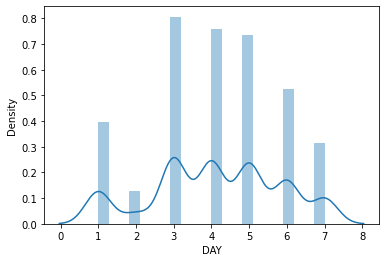

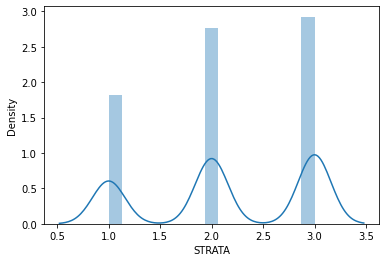

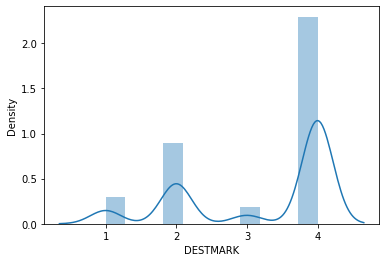

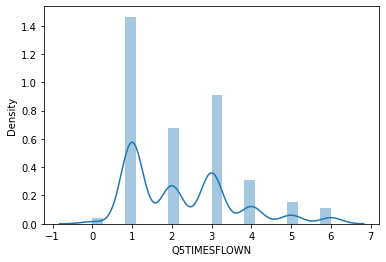

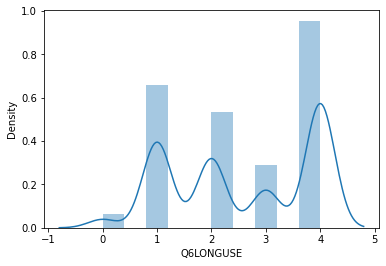

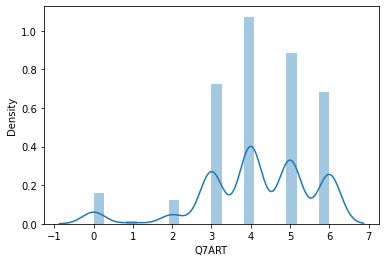

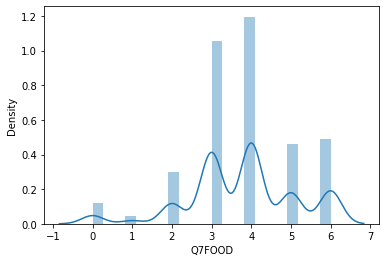

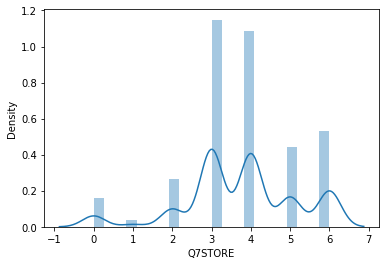

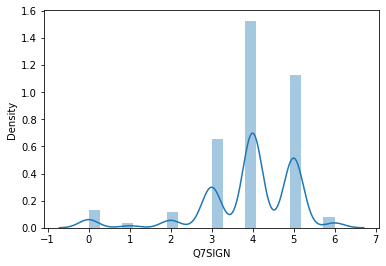

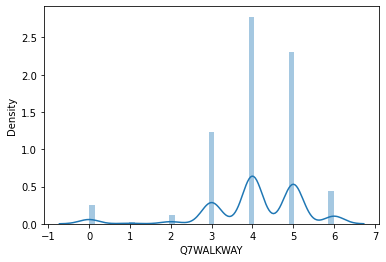

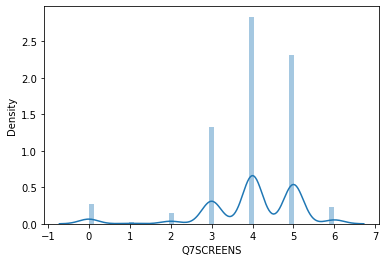

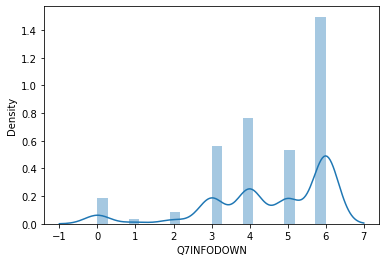

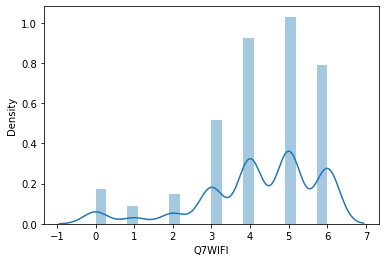

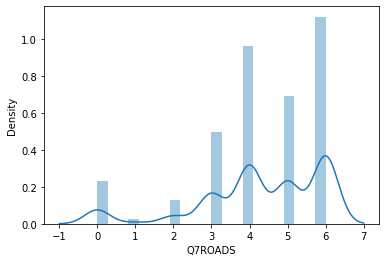

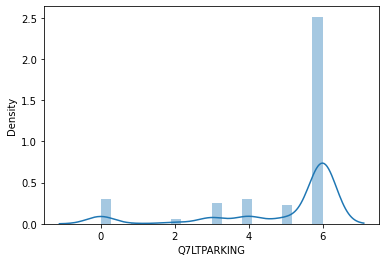

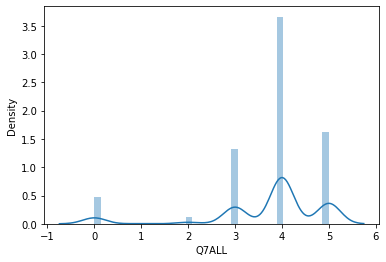

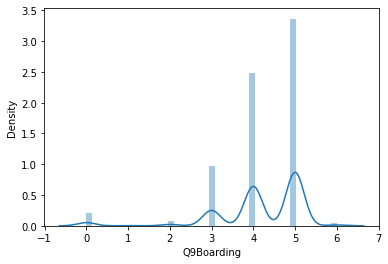

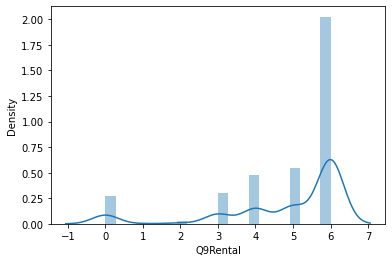

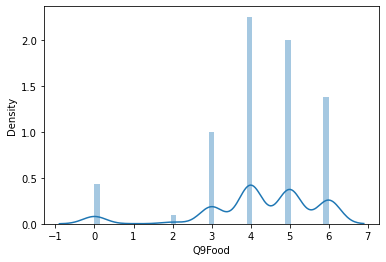

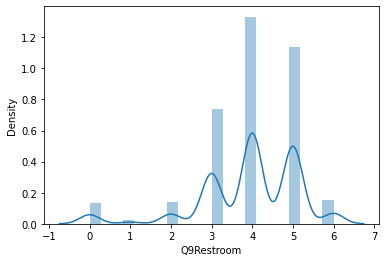

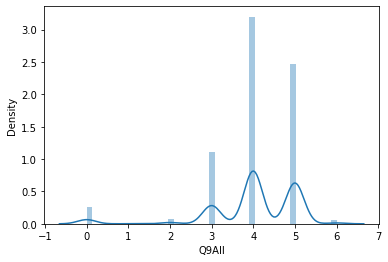

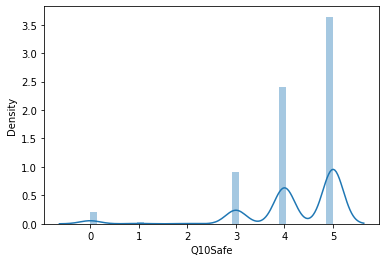

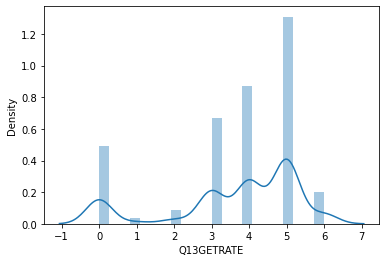

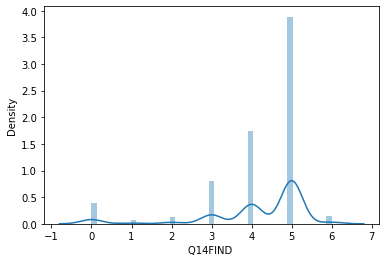

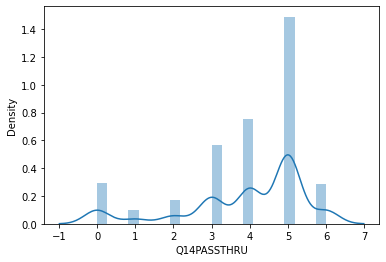

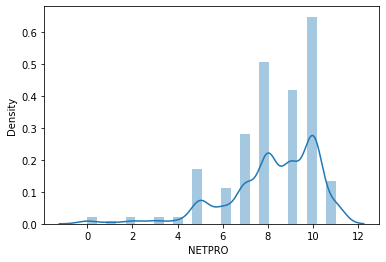

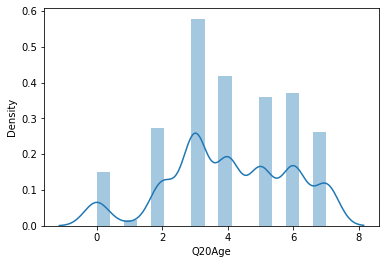

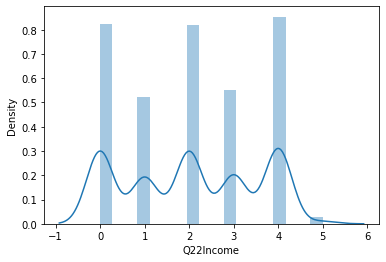

In [50]:
for col in columns_quantitative_no_corr:
    plt.figure()
    sns.distplot(data_2018[col])

In [51]:
data_2018.groupby('Q21Gender')['Q21Gender'].count()

Q21Gender
0     170
1    1217
2    1414
3       8
Name: Q21Gender, dtype: int64

In [52]:
a = data_2018.groupby('DEST_CODE')['DEST_CODE'].count()
a[a > 100]

DEST_CODE
14    111
23    104
34    215
47    151
Name: DEST_CODE, dtype: int64

In [53]:
data_2018.groupby('DESTGEO')['DESTGEO'].count()

DESTGEO
1    975
2    498
3    281
4    220
5     29
6    401
7     79
8    260
9     66
Name: DESTGEO, dtype: int64

<AxesSubplot:xlabel='Q22Income', ylabel='Density'>

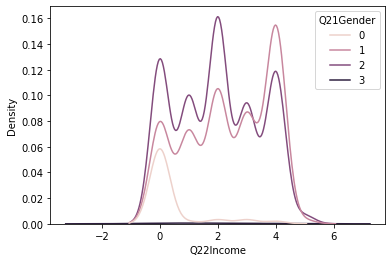

In [54]:
sns.kdeplot(data_2018['Q22Income'], hue = data_2018['Q21Gender'])

<AxesSubplot:xlabel='Q7WIFI', ylabel='Density'>

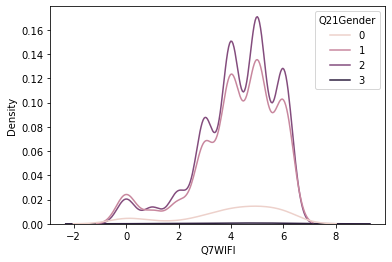

In [55]:
sns.kdeplot(data_2018['Q7WIFI'], hue = data_2018['Q21Gender'])

## Prepare data

In [56]:
# Select columns
data_2018_quantitative = data_2018[columns_quantitative_no_corr]

data_2018_quantitative.head()

,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q9Food,Q9Restroom,Q9All,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income
0,2,3,4,2,1,6,6,3,4,4,...,6,4,3,3,5,4,3,5,6,0
1,2,3,4,1,1,6,3,4,4,4,...,6,4,4,4,4,4,3,7,4,2
2,2,3,4,1,3,3,6,4,4,6,...,6,2,3,4,4,5,3,7,5,5
3,2,3,4,2,0,0,4,4,4,5,...,3,4,4,4,0,0,0,8,2,3
4,2,3,4,3,2,0,0,0,0,0,...,4,5,5,3,3,3,3,8,2,2


In [57]:
print(data_2018_quantitative.isnull().sum())

DAY             0
STRATA          0
DESTMARK        0
Q5TIMESFLOWN    0
Q6LONGUSE       0
Q7ART           0
Q7FOOD          0
Q7STORE         0
Q7SIGN          0
Q7WALKWAY       0
Q7SCREENS       0
Q7INFODOWN      0
Q7WIFI          0
Q7ROADS         0
Q7LTPARKING     0
Q7ALL           0
Q9Boarding      0
Q9Rental        0
Q9Food          0
Q9Restroom      0
Q9All           0
Q10Safe         0
Q13GETRATE      0
Q14FIND         0
Q14PASSTHRU     0
NETPRO          0
Q20Age          0
Q22Income       0
dtype: int64


In [58]:
data_2018_quantitative = data_2018_quantitative.loc[data_2018_quantitative['NETPRO  '] != 11]
data_2018_quantitative = data_2018_quantitative.loc[data_2018_quantitative['Q7ALL'] != 0]
columns_q_0 = [con for con in data_2018_quantitative.columns if con in columns_0]
for con in columns_q_0:
    data_2018_quantitative = data_2018_quantitative.loc[data_2018_quantitative[col] != 0]
len(data_2018_quantitative)

2027

## Elbow function

In [59]:
def find_best_clusters(df, maximum_K):

    clusters_centers = []
    k_values = []

    for k in range(1, maximum_K):

        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    #Generate elbow plot
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

    # return clusters_centers, k_values

## Standardised data

In [60]:
scaler = StandardScaler()
scaler.fit(data_2018_quantitative)
scaled_data = scaler.transform(data_2018_quantitative)
scaled_data

array([[-1.25562543,  1.07102866,  0.7408812 , ..., -0.58000916,
        -0.14575869, -0.59125433],
       [-1.25562543,  1.07102866,  0.7408812 , ..., -0.58000916,
         0.47755959,  2.06023355],
       [-1.25562543,  1.07102866,  0.7408812 , ..., -0.0641344 ,
        -1.39239525,  0.29257496],
       ...,
       [-0.66304039, -0.1992903 ,  0.7408812 , ...,  0.45174035,
         1.10087787,  1.17640426],
       [ 1.70729977, -0.1992903 ,  0.7408812 , ...,  0.45174035,
         1.10087787,  1.17640426],
       [ 1.11471473,  1.07102866, -1.10972409, ...,  0.96761511,
        -0.14575869,  1.17640426]])

## KMeans

### Elbow plot

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\

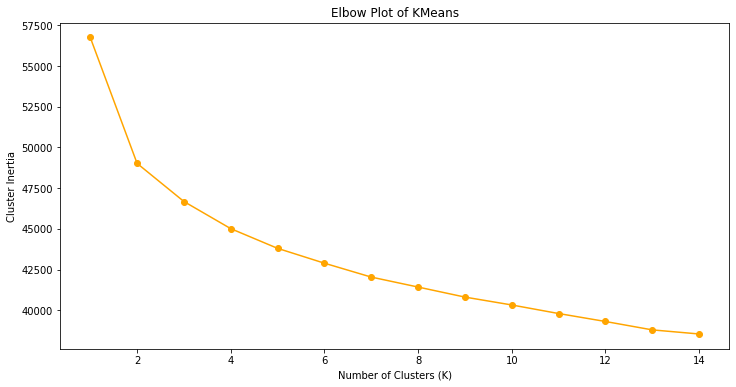

In [72]:
find_best_clusters(scaled_data, 15)

### Dendrogram

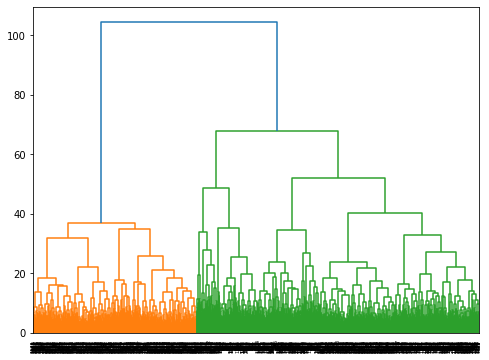

In [76]:
# Method - Ward
clusters = hierarchy.linkage(scaled_data, method="ward")
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

### First trial of k-means on quantitative data

In [65]:
kmeans_model = KMeans(n_clusters = 3)

kmeans_model.fit(scaled_data)

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [66]:
data_2018_quantitative['clusters'] = kmeans_model.labels_

data_2018_quantitative.head()

,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q9Restroom,Q9All,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income,clusters
1,2,3,4,1,1,6,3,4,4,4,...,4,4,4,4,4,3,7,4,2,2
2,2,3,4,1,3,3,6,4,4,6,...,2,3,4,4,5,3,7,5,5,2
3,2,3,4,2,0,0,4,4,4,5,...,4,4,4,0,0,0,8,2,3,0
5,4,3,4,1,1,3,4,3,3,3,...,0,4,5,4,5,3,8,4,4,2
6,2,3,4,1,1,4,3,3,2,3,...,3,4,5,5,4,4,8,3,2,2


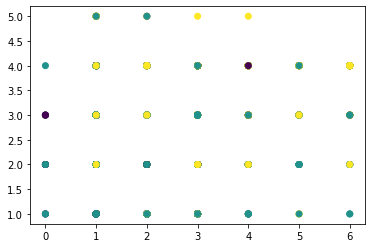

In [67]:
plt.scatter(data_2018_quantitative['Q5TIMESFLOWN'],
            data_2018_quantitative['Q22Income'],
            c = data_2018_quantitative['clusters'])

In [68]:
data_2018_quantitative.loc[data_2018_quantitative['clusters'] == 0].describe()

,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q9Restroom,Q9All,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income,clusters
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0
mean,4.315068,2.230137,3.282192,2.326027,2.621918,3.356164,2.942466,2.978082,3.139726,3.309589,...,3.161644,3.295890,3.843836,2.890411,3.490411,2.986301,6.093151,4.441096,2.827397,0.0
std,1.723119,0.712272,1.053427,1.408571,1.309123,1.394355,1.178787,1.226790,1.040227,1.048306,...,1.130816,1.005539,0.898868,1.723796,1.278753,1.578471,2.236580,1.588059,1.114497,0.0
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,3.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,5.000000,3.000000,2.000000,0.0
50%,4.000000,2.000000,4.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,6.000000,4.000000,3.000000,0.0
75%,6.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,8.000000,6.000000,4.000000,0.0
max,7.000000,3.000000,4.000000,6.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,5.000000,5.000000,6.000000,6.000000,6.000000,10.000000,7.000000,5.000000,0.0


In [69]:
data_2018_quantitative.loc[data_2018_quantitative['clusters'] == 1].describe()

,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q9Restroom,Q9All,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income,clusters
count,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,...,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.0
mean,4.005070,2.121673,3.221800,2.010139,2.352345,4.755387,4.510773,4.506971,4.653992,4.813688,...,4.610900,4.681876,4.650190,4.268695,4.779468,4.580482,9.141952,4.093790,2.335868,1.0
std,1.665559,0.801584,1.075916,1.240148,1.287409,0.957067,1.105569,1.123814,0.639777,0.681157,...,0.804135,0.569030,0.671626,1.443978,0.671791,1.174031,1.268568,1.642186,1.084030,0.0
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,3.000000,1.000000,2.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,9.000000,3.000000,1.000000,1.0
50%,4.000000,2.000000,4.000000,2.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,4.000000,2.000000,1.0
75%,5.000000,3.000000,4.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,5.000000,3.000000,1.0
max,7.000000,3.000000,4.000000,6.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,10.000000,7.000000,5.000000,1.0


In [73]:
data_2018_quantitative.loc[data_2018_quantitative['clusters'] == 2].describe()

,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q9Restroom,Q9All,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income,clusters
count,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,...,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.0
mean,4.139748,2.158076,3.144330,2.555556,2.840779,4.090493,3.587629,3.579611,3.820160,3.915235,...,3.852234,3.977090,4.339061,3.935853,4.404353,4.116838,8.053837,4.273769,2.903780,2.0
std,1.686750,0.802937,1.095139,1.400997,1.211029,1.189524,1.000886,1.104991,0.784574,0.834826,...,0.928609,0.664932,0.753918,1.396427,0.839304,1.267122,1.588545,1.567140,1.108721,0.0
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0
25%,3.000000,1.000000,2.000000,1.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,...,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,7.000000,3.000000,2.000000,2.0
50%,4.000000,2.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,8.000000,4.000000,3.000000,2.0
75%,5.000000,3.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,9.000000,6.000000,4.000000,2.0
max,7.000000,3.000000,4.000000,6.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,10.000000,7.000000,5.000000,2.0


### Second trial of k-means with weight

In [84]:
data_weight = data_2018_quantitative.merge(data_2018, how = 'left')
data_weight.head()

,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q18COUNTRY,HOME,Q19Clear,Q21Gender,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT,Q7MEAN
0,2,3,4,1,1,6,3,4,4,4,...,TURKEY,15,2,1,1,2,2,1,0.670484,4
1,2,3,4,1,3,3,6,4,4,6,...,TURKEY,15,1,1,2,2,2,1,0.670484,4
2,2,3,4,2,0,0,4,4,4,5,...,MACEDONIA,15,2,2,3,2,1,1,0.670484,1
3,4,3,4,1,1,3,4,3,3,3,...,US,12,1,2,3,2,2,1,1.061139,4
4,2,3,4,1,1,4,3,3,2,3,...,TURKEY,15,2,1,2,2,2,1,0.670484,4


In [85]:
kmeans_model = KMeans(n_clusters = 3)

kmeans_model.fit(scaled_data, sample_weight=data_weight['WEIGHT'])

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [86]:
data_2018_quantitative['clusters_2'] = kmeans_model.labels_

data_2018_quantitative.head()

,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q9All,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income,clusters,clusters_2
1,2,3,4,1,1,6,3,4,4,4,...,4,4,4,4,3,7,4,2,2,0
2,2,3,4,1,3,3,6,4,4,6,...,3,4,4,5,3,7,5,5,2,0
3,2,3,4,2,0,0,4,4,4,5,...,4,4,0,0,0,8,2,3,0,1
5,4,3,4,1,1,3,4,3,3,3,...,4,5,4,5,3,8,4,4,2,0
6,2,3,4,1,1,4,3,3,2,3,...,4,5,5,4,4,8,3,2,2,0


In [87]:
# data_2018_quantitative['clusters_2'] = data_2018_quantitative['clusters_2'].replace([1, 2, 0], [0, 1, 2])
data_2018_quantitative['clusters'].compare(data_2018_quantitative['clusters_2'])

,self,other
1,2.0,0.0
2,2.0,0.0
3,0.0,1.0
5,2.0,0.0
6,2.0,0.0
...,...,...
2803,1.0,2.0
2804,0.0,1.0
2805,1.0,2.0
2806,2.0,0.0


In [88]:
data_2018_quantitative.loc[data_2018_quantitative['clusters_2'] == 0].describe()

,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q9All,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income,clusters,clusters_2
count,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,...,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.0
mean,4.100686,2.202517,3.139588,2.471396,2.741419,4.138444,3.639588,3.667048,3.789474,3.895881,...,3.915332,4.299771,3.879863,4.330664,4.080092,7.878719,4.240275,2.862700,1.882151,0.0
std,1.692629,0.793122,1.093022,1.377193,1.233162,1.193841,1.062465,1.158717,0.803246,0.845123,...,0.678363,0.784632,1.447194,0.920331,1.325749,1.709466,1.547100,1.107883,0.423888,0.0
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
25%,3.000000,2.000000,2.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,3.000000,7.000000,3.000000,2.000000,2.000000,0.0
50%,4.000000,2.000000,4.000000,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,8.000000,4.000000,3.000000,2.000000,0.0
75%,5.000000,3.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,5.000000,5.000000,5.000000,9.000000,5.000000,4.000000,2.000000,0.0
max,7.000000,3.000000,4.000000,6.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,5.000000,6.000000,6.000000,6.000000,10.000000,7.000000,5.000000,2.000000,0.0


In [89]:
data_2018_quantitative.loc[data_2018_quantitative['clusters_2'] == 1].describe()

,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q9All,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income,clusters,clusters_2
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,...,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.0
mean,4.320652,2.195652,3.298913,2.432065,2.711957,3.307065,2.926630,2.937500,3.201087,3.347826,...,3.369565,3.913043,3.027174,3.625000,3.067935,6.364130,4.472826,2.834239,0.195652,1.0
std,1.728242,0.723135,1.053241,1.473010,1.305477,1.363500,1.125647,1.147872,1.055825,1.076727,...,1.035789,0.875363,1.700880,1.255234,1.563638,2.268855,1.617116,1.130321,0.594968,0.0
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
25%,3.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,5.000000,3.000000,2.000000,0.000000,1.0
50%,4.000000,2.000000,4.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,4.000000,3.000000,7.000000,4.000000,3.000000,0.000000,1.0
75%,6.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,5.000000,4.000000,8.000000,6.000000,4.000000,0.000000,1.0
max,7.000000,3.000000,4.000000,6.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,5.000000,5.000000,6.000000,6.000000,6.000000,10.000000,7.000000,5.000000,2.000000,1.0


In [90]:
data_2018_quantitative.loc[data_2018_quantitative['clusters_2'] == 2].describe()

,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q9All,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income,clusters,clusters_2
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,...,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.00000,785.000000,785.000000,785.0
mean,4.044586,2.087898,3.219108,2.052229,2.419108,4.731210,4.467516,4.435669,4.666242,4.824204,...,4.722293,4.664968,4.272611,4.803822,4.589809,9.222930,4.11465,2.375796,1.042038,2.0
std,1.658097,0.805700,1.077550,1.256036,1.291215,0.966456,1.098132,1.145645,0.612951,0.646557,...,0.504394,0.659397,1.439982,0.628600,1.138338,1.149527,1.65048,1.097388,0.200804,0.0
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,2.0
25%,3.000000,1.000000,2.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,9.000000,3.00000,1.000000,1.000000,2.0
50%,4.000000,2.000000,4.000000,2.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,4.00000,2.000000,1.000000,2.0
75%,5.000000,3.000000,4.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,5.00000,3.000000,1.000000,2.0
max,7.000000,3.000000,4.000000,6.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,5.000000,6.000000,6.000000,6.000000,10.000000,7.00000,5.000000,2.000000,2.0


### Third trail of k-means with weight - 2 clusters

In [91]:
kmeans_model = KMeans(n_clusters = 2)

kmeans_model.fit(scaled_data, sample_weight=data_weight['WEIGHT'])

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [92]:
data_2018_quantitative['clusters_3'] = kmeans_model.labels_

data_2018_quantitative.head()

,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income,clusters,clusters_2,clusters_3
1,2,3,4,1,1,6,3,4,4,4,...,4,4,4,3,7,4,2,2,0,1
2,2,3,4,1,3,3,6,4,4,6,...,4,4,5,3,7,5,5,2,0,1
3,2,3,4,2,0,0,4,4,4,5,...,4,0,0,0,8,2,3,0,1,0
5,4,3,4,1,1,3,4,3,3,3,...,5,4,5,3,8,4,4,2,0,0
6,2,3,4,1,1,4,3,3,2,3,...,5,5,4,4,8,3,2,2,0,0


In [93]:
data_2018_quantitative.loc[data_2018_quantitative['clusters_3'] == 0].describe()

,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income,clusters,clusters_2,clusters_3
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,...,842.000000,842.000000,842.000000,842.000000,842.000000,842.00000,842.000000,842.000000,842.000000,842.0
mean,4.203088,2.231591,3.229216,2.511876,2.716152,3.662708,3.222090,3.225653,3.448931,3.555819,...,4.048694,3.422803,3.922803,3.530879,6.980998,4.27791,2.872922,1.133017,0.437055,0.0
std,1.675263,0.753777,1.058773,1.450073,1.265644,1.330252,1.113889,1.167905,0.940756,0.962975,...,0.867571,1.580756,1.156064,1.498988,2.052143,1.58657,1.111716,0.991703,0.496317,0.0
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.0
25%,3.000000,2.000000,2.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,3.000000,3.000000,3.000000,6.000000,3.00000,2.000000,0.000000,0.000000,0.0
50%,4.000000,2.000000,4.000000,2.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,7.000000,4.00000,3.000000,2.000000,0.000000,0.0
75%,5.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,8.000000,6.00000,4.000000,2.000000,1.000000,0.0
max,7.000000,3.000000,4.000000,6.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,5.000000,6.000000,6.000000,6.000000,10.000000,7.00000,5.000000,2.000000,1.000000,0.0


In [94]:
data_2018_quantitative.loc[data_2018_quantitative['clusters_3'] == 1].describe()

,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income,clusters,clusters_2,clusters_3
count,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,...,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.0
mean,4.059072,2.103797,3.178059,2.152743,2.536709,4.610970,4.263291,4.263291,4.429536,4.582278,...,4.600000,4.200000,4.714768,4.493671,8.936709,4.202532,2.524051,1.334177,1.324895,1.0
std,1.695051,0.806557,1.096458,1.279171,1.281579,1.025707,1.114195,1.166774,0.752454,0.784256,...,0.666779,1.454722,0.680068,1.191964,1.360722,1.617418,1.123898,0.471901,0.946150,0.0
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0
25%,3.000000,1.000000,2.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,5.000000,4.000000,8.000000,3.000000,2.000000,1.000000,0.000000,1.0
50%,4.000000,2.000000,4.000000,2.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,9.000000,4.000000,2.000000,1.000000,2.000000,1.0
75%,5.000000,3.000000,4.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,10.000000,6.000000,4.000000,2.000000,2.000000,1.0
max,7.000000,3.000000,4.000000,6.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,5.000000,6.000000,6.000000,6.000000,10.000000,7.000000,5.000000,2.000000,2.000000,1.0
